## Domain Knowledge

### Dataset Features

Age: Patient's age (in years). Age is a critical factor in assessing diabetes risk, with older individuals often having a higher likelihood of developing the condition.

Gender: Patient's gender (Male/Female/Other). Certain studies suggest differences in diabetes prevalence between genders.

BMI (Body Mass Index): A measure of body fat based on weight and height. High BMI values are strongly associated with diabetes risk.

Hypertension: Indicates whether the patient has high blood pressure (Yes/No). Hypertension is a common comorbidity in diabetic patients.

Heart Disease: Presence of heart disease (Yes/No). Cardiovascular issues often correlate with diabetes.

Smoking History: Patient’s history of smoking (never, former, current). Smoking may contribute to an increased risk of diabetes and other health complications.

HbA1c Level: Hemoglobin A1c percentage, a key marker for average blood sugar levels over the past three months. Higher values indicate poorer glucose control.
Blood Glucose Level: Measured glucose level (mg/dL). Elevated levels are indicative of potential diabetes or prediabetes.

Diabetes: Target variable (Positive/Negative). Indicates whether the patient has been diagnosed with diabetes.

## Exploratory Data Analysis (EDA)

### Importing Libraries

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

### Exploring Data

In [48]:
df = pd.read_csv('./diabetes_prediction_dataset.csv')

In [49]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [51]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


### Feature Selection

In [52]:
print(df['smoking_history'].unique())

['never' 'No Info' 'current' 'former' 'ever' 'not current']


In [53]:
df['smoking_history'] = df['smoking_history'].map({
    'No Info': 0,
    'never': 1,
    'former': 2,
    'not current': 3,
    'current': 4,
    'ever': 5
})
print(df['smoking_history'].unique())

[1 0 4 2 5 3]


In [54]:
print(df.gender.unique())

['Female' 'Male' 'Other']


In [55]:
df['gender'] = df['gender'].map({
    'Female': 0,
    'Male': 1,
    'Other': 2,
})
print(df['gender'].unique())

[0 1 2]


## EXPOLATORY DATA ANALYSIS (EDA)

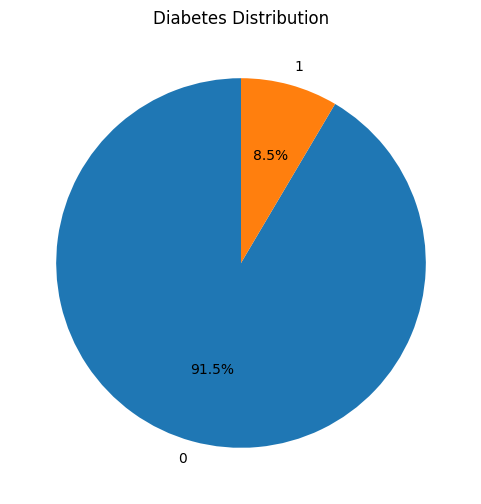

diabetes
0    91500
1     8500
Name: count, dtype: int64

In [56]:
diabetes_counts = df['diabetes'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(diabetes_counts, labels=diabetes_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Diabetes Distribution")
plt.show()

diabetes_counts

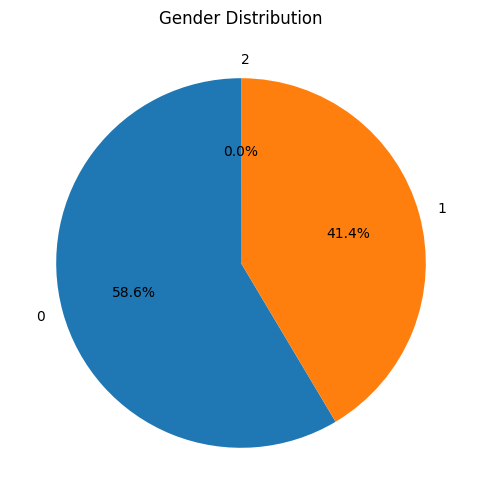

In [57]:
gender_counts = df['gender'].value_counts()

# Create the pie chart
plt.figure(figsize=(6, 6))  # Adjust figure size as needed
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()

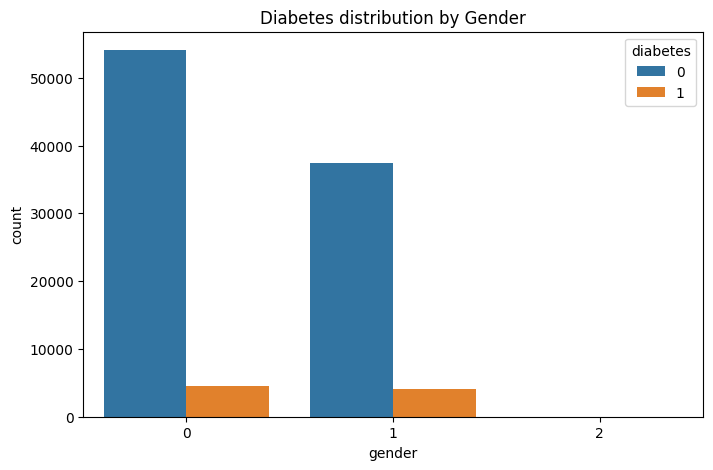

In [58]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='gender', hue='diabetes')
plt.title("Diabetes distribution by Gender")
plt.show()

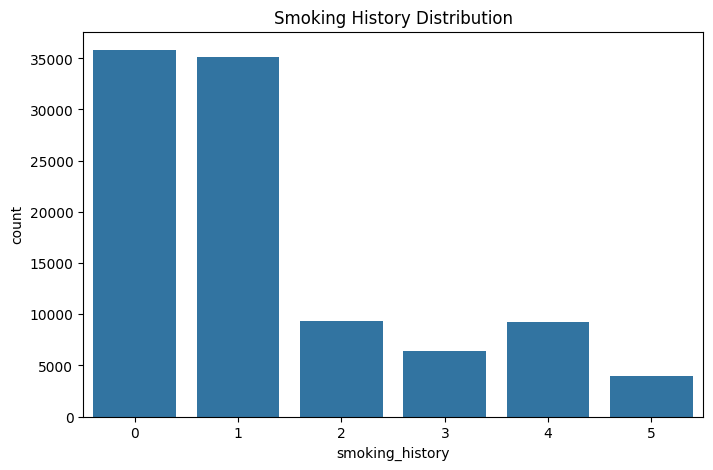

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='smoking_history')
plt.title("Smoking History Distribution")
plt.show()

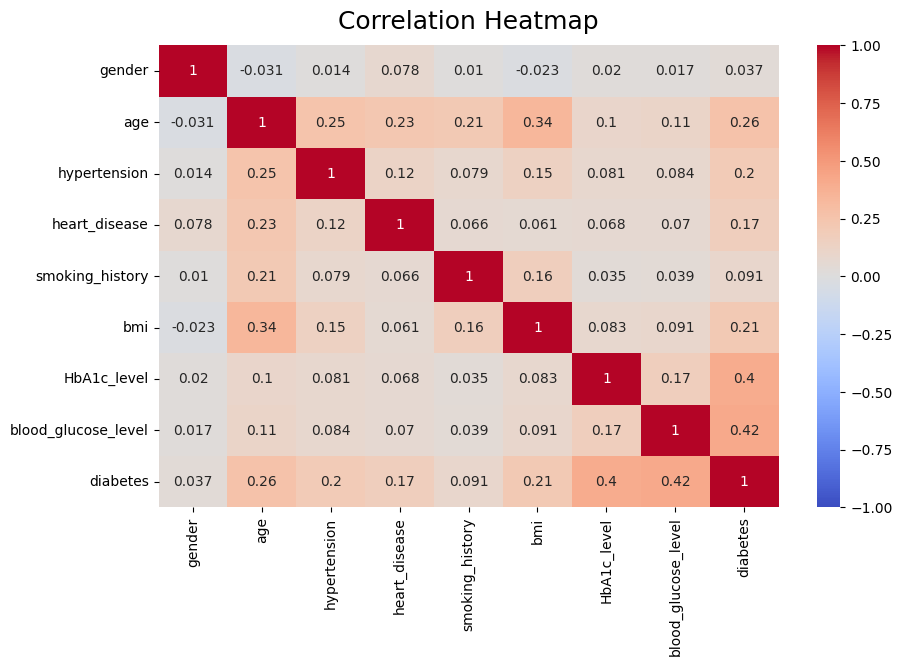

In [ ]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 18}, pad=12)

plt.show()